# Classifying Electrocardiograms

## (1) Electrocardiograms

👇 Import the [`electrocardiograms.csv`](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_dataset.csv) dataset and display its first 5 rows

In [8]:
import pandas as pd
#pd.set_option("max_columns", None)

data = pd.read_csv("/Users/guilhermecavalcantidesabarreto/code/guipyc/data-electrocardiograms/data/electrocardiograms.csv")
data

data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.994200,1.000000,0.951276,0.903712,0.917633,0.900232,0.803944,0.656613,0.421114,0.288863,...,0.294664,0.295824,0.301624,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.984472,0.962733,0.663043,0.211180,0.000000,0.032609,0.100932,0.177019,0.270186,0.313665,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.619217,0.489324,0.327402,0.110320,0.000000,0.060498,0.108541,0.108541,0.145907,0.192171,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


💓 Each observation of the dataset is a sequence of measured heartbeats, taken from a patient's electrocardiogram (ECG).

🎯 The target is binary and defines whether the heartbeat shows:
* a risk of cardiovascular disease 🔴 (1)
* or not 🟢 (0)

## (2) Data Exploration

❓ **Question** ❓

Plot an observation of each target class to get a visual idea of what the numbers represent.

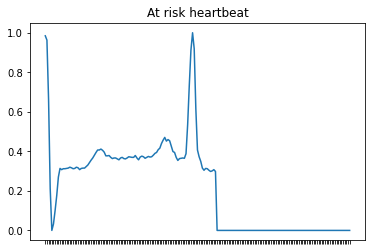

In [9]:
import matplotlib.pyplot as plt

plt.plot(data.iloc[3, :-1])
plt.tick_params(labelbottom=False)
plt.title('At risk heartbeat')
plt.show()

❓ **Questions** ❓

* How many observations of at-risk heartbeats are there? Save your answer as `at_risk_count`.

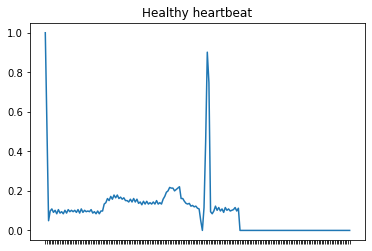

In [10]:
plt.plot(data.iloc[19560, :-1])
plt.tick_params(labelbottom=False)
plt.title('Healthy heartbeat')
plt.show()

* How many observations of healthy heartbeats are there? Save your answer as `healthy_count`.

In [12]:
at_risk_count = data.target.value_counts()[1]
at_risk_count

1448

In [13]:
healthy_count = data.target.value_counts()[0]
healthy_count

18117

👩🏻‍🏫 In certain cases, the class balance is representative of the true class distribution. This is the case here: the vast majority of people actually have healthy hearts. In such case, we preserve the class distribution to train the model based on reality, and adapt our modeling approach accordingly.

[Centers for Disease Control and Prevention - Heart Disease Facts](https://www.cdc.gov/heartdisease/facts.htm)

🧪 **Check your code**

In [14]:
from nbresult import ChallengeResult

result = ChallengeResult('class_balance',
                         healthy = healthy_count,
                         at_risk = at_risk_count)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/guilhermecavalcantidesabarreto/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/guilhermecavalcantidesabarreto/code/guipyc/data-electrocardiograms
plugins: anyio-3.4.0
collecting ... collected 2 items

tests/test_class_balance.py::TestClass_balance::test_at_risk_count PASSED [ 50%]
tests/test_class_balance.py::TestClass_balance::test_healthy_count PASSED [100%]

============================== 2 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/class_balance.pickle

git commit -m 'Completed class_balance step'

git push origin master


In [15]:
!git add tests/class_balance.pickle

!git commit -m 'Completed class_balance step'

!git push origin master

[master da78a9c] Completed class_balance step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/class_balance.pickle
Enumerating objects: 18, done.
Counting objects: 100% (18/18), done.
Delta compression using up to 8 threads
Compressing objects: 100% (16/16), done.
Writing objects: 100% (18/18), 5.76 KiB | 2.88 MiB/s, done.
Total 18 (delta 5), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (5/5), done.
To github.com:guipyc/data-electrocardiograms.git
 * [new branch]      master -> master


##  (3) Logistic Regression

🎯 Your task is to **flag heartbeats that are at risk of cardiovascular diseases.**

👇 Let's start by investigating the performance of a `LogisticRegression` on that task. Use a ***cross-validation to evaluate the model*** on the following metrics:
- Accuracy
- Recall
- Precision
- F1

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Ready X and y
X = data.loc[:, 'x_1':'x_187']
y = data['target']

# 10-Fold Cross validate model
log_cv_results = cross_validate(LogisticRegression(max_iter=1000), 
                                X, y, 
                                cv=10, 
                                scoring=['accuracy','recall','precision','f1'])

❓ **Question (Ratio of correct predictions)** ❓ 

What is the ratio of correct predictions for this model ? Save your answer under variable name `correct_pred_ratio`.

In [17]:
correct_pred_ratio = log_cv_results['test_accuracy'].mean()
correct_pred_ratio

0.9390746917624634

❓ **Question (Ability to flag at-risk patients)** ❓ 

What percentage of at-risk heartbeats is the model able to flag? Save your answer under variable name `flag_ratio`.

In [18]:
flag_ratio = log_cv_results['test_recall'].mean()
flag_ratio

0.32938697318007665

❓ **Question (Ability to flag correctly)** ❓ 

When the model signals an at-risk heartbeat, how often is it correct? Save your answer under variable name `correct_detection_ratio`.

In [19]:
correct_detection_ratio = log_cv_results['test_precision'].mean()
correct_detection_ratio

0.6832685782552069

❓ **Question (Detecting as many at-risk patients as possible without too many false alarms)** ❓ 

What is the model's ability to flag as many at-risk heartbeats as possible while limiting false alarms?  Save your answer under variable name `aggregated_metric`.

In [20]:
aggregated_metric = log_cv_results['test_f1'].mean()
aggregated_metric

0.443460572263365

🧪 **Check your code**

In [21]:
from nbresult import ChallengeResult

result = ChallengeResult('logistic_regression_evaluation',
                         accuracy = correct_pred_ratio,
                         recall = flag_ratio,
                         precision = correct_detection_ratio,
                         f1 = aggregated_metric)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/guilhermecavalcantidesabarreto/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/guilhermecavalcantidesabarreto/code/guipyc/data-electrocardiograms
plugins: anyio-3.4.0
collecting ... collected 4 items

tests/test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_accuracy PASSED [ 25%]
tests/test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_f1 PASSED [ 50%]
tests/test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_precision PASSED [ 75%]
tests/test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_recall PASSED [100%]

============================== 4 passed in 0.12s ===============================


💯 You can commit your code:

git add tests/logistic_regression_evaluation.pickle

git commi

In [22]:
!git add tests/logistic_regression_evaluation.pickle

!git commit -m 'Completed logistic_regression_evaluation step'

!git push origin master

[master 47cea32] Completed logistic_regression_evaluation step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/logistic_regression_evaluation.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 626 bytes | 626.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:guipyc/data-electrocardiograms.git
   da78a9c..47cea32  master -> master


▶️ Run the following cell before moving on:

In [23]:
print(f"You should have noticed that the model was able to predict correctly in {int(round(correct_pred_ratio,2)*100)} cases out of 100. ")

print(f"However, it was able to capture only {round(flag_ratio,2)*100} % of the at-risk patients")

print("Why ? Let's print a confusion matrix!")


You should have noticed that the model was able to predict correctly in 94 cases out of 100. 
However, it was able to capture only 33.0 % of the at-risk patients
Why ? Let's print a confusion matrix!


## (4) Confusion Matrix

👇 Using `plot_confusion_matrix` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)),  visualize the predictions breakdown of the Logistic Regression model.

<details>
<summary>💡 Hints</summary>

    
1. [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)    
2. ['ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
    
- Don't forget to to go back to the **Holdout method** to [`train-test-split`]((https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) your dataset and look at the confusion matrix on the test set.  
</details>



--------------------------------------------------
Printing the confusion Matrix


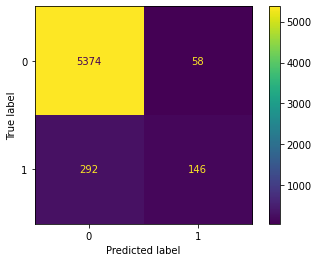

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# STEP 0 - Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# STEP 1 - Instantiate and train the model on the training data
log_model = LogisticRegression(max_iter=1000).fit(X_train,y_train)


# # STEP 2b - Predictions on the test set
y_pred = log_model.predict(X_test)

# STEP 2b - Plot the confusion matrix

print("-"*50)
print("Printing the confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=log_model.classes_
)

disp.plot()

ℹ️ The confusion matrix should show that the model is influenced by the class imbalance: it predicts the heartbeats to be healthy most of the time. Due to this behaviour, the model is often correct and has a **high accuracy**. However, this also causes it to miss out on many at-risk heartbeats: it has **bad recall**...

👉 This model is therefore poor at the task of **flagging at-risk observations**.

❗️ Don't be fooled by the accuracy and look at the metric that corresponds to your task! ❗️

## (5) KNN Classifier

❓ **Question (Classification Model Selection)** ❓ 

Would a default KNN classifier perform better at the task of flagging at-risk observations?

Save the you answer under `best_model` as "KNN" or "LogisticRegression".

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# 10-Fold Cross validate model and evaluate recall
knn_cv_results = cross_validate(KNeighborsClassifier(n_neighbors=5), 
                                X, y, 
                                cv=10, 
                                scoring=['recall']) 

knn_score = knn_cv_results['test_recall'].mean()
print(knn_score)

best_model = "KNN"

0.8680507662835248


💪 For this ECG dataset, the KNN Classifier should have a much higher recall than the LogisticRegression and therefore is better suited for the task.

🧪 **Check your code**

In [27]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/guilhermecavalcantidesabarreto/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/guilhermecavalcantidesabarreto/code/guipyc/data-electrocardiograms
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_best_model.py::TestBest_model::test_best_model PASSED         [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master


In [29]:
!git add .

!git commit -m 'Completed best_model step'

!git push origin ma

[master 34702c6] Completed best_model step
 1 file changed, 522 insertions(+), 37 deletions(-)
error: src refspec ma does not match any
error: failed to push some refs to 'github.com:guipyc/data-electrocardiograms.git'


## (6) Classification Report

Now that we have selected the KNN model thanks to its higherbest recall, let's have a look at the other classification performance metrics>

❓ **Question (Classification Report)** ❓

Print out a [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) of the KNN model.

<details>
    <summary> 💡 <i>Hint</i>  </summary>
    
* You will need to pass the predictions of the model to a `classification_report`.
    
* SkLearn's [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) might help 😉
</details>




In [30]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=5), X, y) # Make cross validated predictions of entire dataset

print(classification_report(y,y_pred)) # Pass predictions and true values to Classification report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18117
           1       0.94      0.86      0.90      1448

    accuracy                           0.99     19565
   macro avg       0.96      0.93      0.94     19565
weighted avg       0.99      0.99      0.99     19565



❓ **Question (Reading the report)** ❓


Among the heartbeats predicted at-risk, what is the ratio of correct predictions ? 

In mathematical terms, can you read the ratio $ \frac{TP}{TP + FP} $ in the report? What is the name of this classification metrics ? 

Save your answer as a float under `correct_at_risk_predictions`

In [31]:
correct_at_risk_predictions = 0.94

🧪 **Check your code**

In [32]:
from nbresult import ChallengeResult

result = ChallengeResult('precision',
                         precision = correct_at_risk_predictions)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/guilhermecavalcantidesabarreto/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/guilhermecavalcantidesabarreto/code/guipyc/data-electrocardiograms
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_precision.py::TestPrecision::test_precision PASSED            [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/precision.pickle

git commit -m 'Completed precision step'

git push origin master


In [33]:
!git add tests/precision.pickle

!git commit -m 'Completed precision step'

!git push origin master

[master 43d210a] Completed precision step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/precision.pickle
Enumerating objects: 14, done.
Counting objects: 100% (14/14), done.
Delta compression using up to 8 threads
Compressing objects: 100% (11/11), done.
Writing objects: 100% (11/11), 28.57 KiB | 7.14 MiB/s, done.
Total 11 (delta 5), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (5/5), completed with 2 local objects.
To github.com:guipyc/data-electrocardiograms.git
   47cea32..43d210a  master -> master


## (7) Prediction

❓ **Question (Predicting)** ❓

A patient comes to you for a second opinion because  he was told that based on his heartbeats, this patient may be at-risk.  

According to your optimal model, is he at-risk or not?  

Save the prediction of your model under variable name `prediction` as "at risk" or "healthy".

In [35]:
new_patient = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_new_patient.csv')
new_patient

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_178,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187
0,0.904762,0.993197,1.0,0.956916,0.902494,0.857143,0.802721,0.777778,0.709751,0.557823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
knn_model = KNeighborsClassifier().fit(X,y) # Fit the model you have found to be optimal (Default KNN)

model_prediction = knn_model.predict(new_patient)[0] # Make prediction
print(model_prediction)

prediction = "at risk"

1


🧪 **Check your code**

In [37]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/guilhermecavalcantidesabarreto/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/guilhermecavalcantidesabarreto/code/guipyc/data-electrocardiograms
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_prediction.py::TestPrediction::test_prediction_at_risk PASSED [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master


🏁 Congratulations!

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!